In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

import visualization
import data_collection

# Analysis of song popularity, lyrics and music features

The project contains data collection, cleaning and analysis of different datasets with songs, containing information about Billboard Hot 100 charts, spotify features and lyrics.


In [5]:
hot_100 = pd.read_csv("filled_spotify.csv").drop("Unnamed: 0", axis=1)
hot_100.describe()

,peak_position,weeks_on_chart,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity
count,31459.000000,31459.000000,24719.000000,24665.000000,24665.000000,24665.000000,24665.000000,24665.000000,24665.000000,24665.000000,24665.000000,24665.000000,24665.000000,24665.000000,24719.000000
mean,46.822817,10.965097,220.237838,0.600180,0.618146,5.229516,-8.631842,0.726049,0.073896,0.293460,0.032183,0.191901,0.598586,120.339127,41.663660
std,30.439163,8.550567,67.539963,0.152923,0.198420,3.561697,3.592360,0.445993,0.083451,0.282088,0.135481,0.158567,0.239511,28.081366,22.597551
min,1.000000,1.000000,29.688000,0.000000,0.000581,0.000000,-28.030000,0.000000,0.000000,0.000003,0.000000,0.009670,0.000000,0.000000,0.000000
25%,19.000000,4.000000,174.800000,0.499000,0.476000,2.000000,-10.990000,0.000000,0.032200,0.046200,0.000000,0.091200,0.409000,99.076000,23.000000
50%,47.000000,9.000000,214.426000,0.608000,0.634000,5.000000,-8.162000,1.000000,0.041400,0.192000,0.000004,0.131000,0.617000,119.001000,43.000000
75%,73.000000,16.000000,252.699500,0.708000,0.776000,8.000000,-5.835000,1.000000,0.068600,0.507000,0.000443,0.248000,0.800000,136.801000,60.000000
max,100.000000,91.000000,3079.157000,0.988000,0.997000,11.000000,2.291000,1.000000,0.951000,0.991000,0.982000,0.999000,0.991000,241.009000,100.000000


In [6]:
hot_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31459 entries, 0 to 31458
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song                31459 non-null  object 
 1   artist              31459 non-null  object 
 2   peak_position       31459 non-null  int64  
 3   weeks_on_chart      31459 non-null  int64  
 4   date                31459 non-null  object 
 5   spotify_genre       28189 non-null  object 
 6   track_duration_s    24719 non-null  float64
 7   explicit_track      24719 non-null  object 
 8   danceability        24665 non-null  float64
 9   energy              24665 non-null  float64
 10  key                 24665 non-null  float64
 11  loudness            24665 non-null  float64
 12  mode                24665 non-null  float64
 13  speechiness         24665 non-null  float64
 14  acousticness        24665 non-null  float64
 15  instrumentalness    24665 non-null  float64
 16  live

In [7]:
hot_100.columns

Index(['song', 'artist', 'peak_position', 'weeks_on_chart', 'date',
       'spotify_genre', 'track_duration_s', 'explicit_track', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'spotify_popularity', 'main_artist'],
      dtype='object')

## Correlations between different features

Not all songs have information for every feature. Lets plot a heatmap to see the correlations between all numerical features. By default the heatmap ignores NaN values, so we don't have to worry about them at the moment. Also lets inverse the columns showing the position for the song, as currently higher position is considered worse, because of the lower numerical value.

In [9]:
hot_100.peak_position = hot_100.peak_position * -1

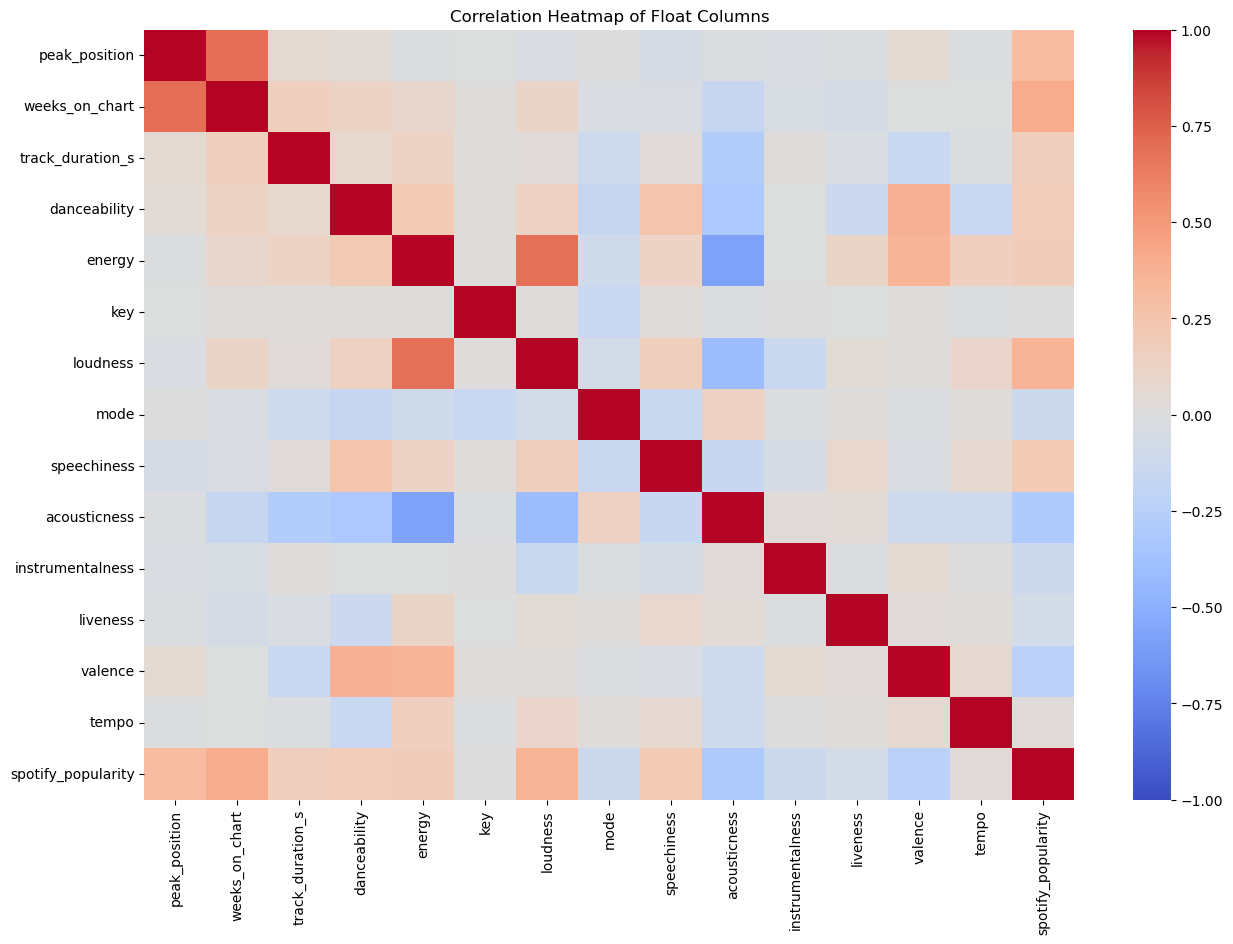

In [10]:
# Calculate the correlation matrix
hot_100_numerical = hot_100.select_dtypes(include = ['float', 'int'])
correlation_matrix = hot_100_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Float Columns')
plt.show()

In [11]:
hot_100_numerical.corr()

,peak_position,weeks_on_chart,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity
peak_position,1.000000,0.693296,0.053686,0.040857,-0.013735,-0.003614,-0.028088,0.006550,-0.062242,-0.015198,-0.029608,-0.021743,0.048154,-0.009355,0.308997
weeks_on_chart,0.693296,1.000000,0.157696,0.120083,0.088530,0.013148,0.114970,-0.030601,-0.036409,-0.160631,-0.045142,-0.061045,-0.003231,-0.006415,0.400132
track_duration_s,0.053686,0.157696,1.000000,0.077185,0.120054,0.008340,0.027739,-0.115820,0.026367,-0.280709,0.019850,-0.030364,-0.141441,-0.018834,0.170206
danceability,0.040857,0.120083,0.077185,1.000000,0.201542,0.015764,0.138427,-0.162005,0.255451,-0.314082,-0.001454,-0.128518,0.380497,-0.142575,0.180676
energy,-0.013735,0.088530,0.120054,0.201542,1.000000,0.022147,0.682878,-0.101378,0.132385,-0.584845,-0.002375,0.112897,0.353572,0.159072,0.172731
key,-0.003614,0.013148,0.008340,0.015764,0.022147,1.000000,0.008130,-0.142557,0.022301,-0.021663,0.004056,-0.003604,0.014344,-0.014429,0.002492
loudness,-0.028088,0.114970,0.027739,0.138427,0.682878,0.008130,1.000000,-0.080979,0.170090,-0.408790,-0.136238,0.041753,0.013957,0.095164,0.355740
mode,0.006550,-0.030601,-0.115820,-0.162005,-0.101378,-0.142557,-0.080979,1.000000,-0.136237,0.141322,-0.008916,0.011471,-0.016320,0.016023,-0.119664
speechiness,-0.062242,-0.036409,0.026367,0.255451,0.132385,0.022301,0.170090,-0.136237,1.000000,-0.155903,-0.058323,0.080394,-0.031080,0.062561,0.207353
acousticness,-0.015198,-0.160631,-0.280709,-0.314082,-0.584845,-0.021663,-0.408790,0.141322,-0.155903,1.000000,0.028427,0.039020,-0.115073,-0.104476,-0.301775


#### Some interesting observations:

- As expected, positive correlations between chart poristion, weeks on chart and spotify popularity;
- Moderate correlation between spotify popularity and loudness. Loud songs tend to be more popular. Meanwhile there is a negative correlation between acousticness and popularity;
- Higher energy equates to higher loudness and valence;
- Valence and danceability are also correlated, however energy and danceability - not as much;
- Higher danceability, loudness, track duration and energy all lead to lower acousticness;

## Most popular artists

Lets take a look at the most popular artists based on billboard charts and spotify popularity and see if they are mostly the same for both.

### Most popular artists on the Billboard Hot 100 chart

To find out which are the most popular artists on the chart, I will visualize the 15 artists who have the most songs that have charted, then see the artists with the highest average position, most weeks on the chart and highest spotify popularity. Lets see if these three criteria each paint a different picture.

Considering that some songs have featuring artists, it will be better to count the song as it belongs to all of the artists, performing it. I will make a visualization for both counting only the main artist and counting all artists.


In [15]:
hot_100_expanded_artists = hot_100.explode('artist_list')

KeyError: 'artist_list'

In [ ]:
#Plot artists with most songs on the chart
main_artists_songs = hot_100.main_artist.value_counts()
expanded_artists_songs = hot_100_expanded_artists.artist_list.value_counts()
visualization.plot_popular_artists(
    main_artists_songs, expanded_artists_songs, name_y = "Song count", title = "Artists with most songs on the Billboard Hot 100", count = 15
)

The top four is the same both when counting features and not - Taylor Swift, Drake, Glee Cast (a popular TV musical show) and Future. For number of artists' own songs, Taylor Swift is first, but when we take into account the artist featuring in other's songs, Drake overtakes her. Many popular songs have a small rap part, performed by a rapper and many popular rap songs have more than one performer, which makes some rappers rise in position in the second chart - Lil Wayne, Lil Uzi Vert. Nicki Minaj and Travis Scott are not even in the top 15 when looking at only their own songs, as a big part of their chart performance is when they are featured on other artist's songs.

In [ ]:
#Plot artists whose songs have spent the most weeks on charts
artists_most_weeks = hot_100.groupby('main_artist')['weeks_on_chart'].sum().sort_values(ascending = False)
artists_most_weeks_features = (
    hot_100_expanded_artists.groupby('artist_list')['weeks_on_chart'].sum().sort_values(ascending = False)
)
visualization.plot_popular_artists(
    artists_most_weeks, artists_most_weeks_features, name_y = "Total weeks", title = "Artists with most weeks on chart", count = 15
)

This visualizes the number of weeks all songs of each artist have spent on the chart in total. Drake and Taylor are again leading the chart both with just their songs and with features included, however Drake heavily outnumbers Taylor Swift when we take features into account, while Taylor's total weeks seem to not change at all, which is because she rarely features on other's songs. Madonna's position falls down, as she is also an artist who is rarely featured on other's songs.

In [ ]:
#Plot artists with the highest average spotify popularity per song, but only count ones with more than 30 songs
#30 is the needed data points for statistical significance
song_counts = hot_100.groupby('main_artist')['spotify_popularity'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

popularity_spotify = (hot_100[hot_100['main_artist'].isin(above_30_songs)]
                   .groupby('main_artist')['spotify_popularity']
                   .mean()
                   .sort_values(ascending=False))


#Do the same, while counting features
song_counts = hot_100_expanded_artists.groupby('artist_list')['spotify_popularity'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

popularity_with_features_spotify = (hot_100_expanded_artists[hot_100_expanded_artists['artist_list'].isin(above_30_songs)]
                   .groupby('artist_list')['spotify_popularity']
                   .mean()
                   .sort_values(ascending=False))

In [ ]:
visualization.plot_popular_artists(
    popularity_spotify, popularity_with_features_spotify, 
    name_y = "Average spotify popularity per song", 
    title = "Most Popular Artists On Spotify Based On Billboard Hot 100 Songs", count = 15
)

Mostly the same names are in the top 15 again, however there is some difference in the positions of artists, leading the charts, and ones, leading in spotify for the same songs. One interesting observation is that the rapper Juice WRLD is the most popular in spotify, when taking features into account. This means he is features in a lot of popular songs, but his own ones aren't on the same level of popularity.

Names like Drake and Taylor are in a little lower position here, mostly because of the sheer number of songs they have charted, leading the average spotify popularity down.

In [ ]:
#Plot artists with the highest average position on the charts, again only for artists with more than 30 songs
song_counts = hot_100.groupby('main_artist')['peak_position'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

average_position = (hot_100[hot_100['main_artist'].isin(above_30_songs)]
                   .groupby('main_artist')['peak_position']
                   .mean()
                   .sort_values(ascending=False)) * -1


#Do the same, while counting features
song_counts = hot_100_expanded_artists.groupby('artist_list')['peak_position'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

average_position_features = (hot_100_expanded_artists[hot_100_expanded_artists['artist_list'].isin(above_30_songs)]
                   .groupby('artist_list')['peak_position']
                   .mean()
                   .sort_values(ascending=False)) * -1

In [ ]:
visualization.plot_popular_artists(
    average_position, average_position_features, 
    name_y = "Average chart position", 
    title = "Artists with the highest average chart positions", count = 15
)

When looking atthe artists with the highest average position on the charts, Madonna is a clear winner, followed by Michael Jackson and Rihanna. The artists when counting and not counting features are mostly the same with some small movement in their position.

## Genre Analysis

Lets perform some analysis on the genres, given to the songs, based on their performers' associated genres. Currently the genres feature is stored as a list. I will expand the dataset to contain a row for each genre of a song.

Lets see which are the genres, which are most common on the Billboard Hot 100. Then lets see how popular were some genres over the years. I first need to extract the year from the date column.

In [ ]:
hot_100.date = pd.to_datetime(hot_100.date)
hot_100['year'] = hot_100.date.dt.year

hot_100.spotify_genre = hot_100.spotify_genre.dropna().apply(ast.literal_eval)
hot_100_expanded_genres = hot_100.explode('spotify_genre')
hot_100_expanded_genres = hot_100_expanded_genres.dropna(subset = 'spotify_genre')

In [ ]:
common_genres = hot_100_expanded_genres.spotify_genre.value_counts().head(25).to_dict()

plt.figure(figsize = (13, 7))
plt.bar(common_genres.keys(), common_genres.values(), color = 'mediumspringgreen', edgecolor = 'black')
plt.xlabel('Genre')
plt.ylabel('Number of songs')
plt.xticks(rotation = 30, ha = 'right')
plt.title('Top 25 most common genres in the Billboard Hot 100')
plt.grid(axis = 'y')

plt.show()

### Genre chart pressence

The most common is 'mellow gold' - a style of music that blends alternative rock with folk, country, and lo-fi elements. Lets see how it performed over the years.

In [ ]:
visualization.plot_genre_performance(hot_100_expanded_genres, "mellow gold")

We can see mellow gold started rising in popularity during the late 60s and lost it fast during the late 80s. This is about 20 years dominated by the genre. After the year 2000, mellow gold songs are very rare on the Billboard Hot 100.

In [ ]:
visualization.period_avg_position(hot_100_expanded_genres, "mellow gold", 1965, 1990)

In [ ]:
visualization.plot_genre_performance(hot_100_expanded_genres, "soft rock")

Soft rock genre was very popular during the 70s to 90s, then gradually dropped off and lost pretty much all its pressence in the charts by the year 2000

In [ ]:
visualization.period_avg_position(hot_100_expanded_genres, 'soft rock', 1965, 1990)

Adult standards primarily features a blend of pop, jazz, and big band music from the mid-20th century

In [ ]:
visualization.plot_genre_performance(hot_100_expanded_genres, "adult standards")

It reached its peak pressence in the charts during the mid 60s and started to gradually decrease after that. Its average position is a little lower compared to the previous two genres.

In [ ]:
visualization.period_avg_position(hot_100_expanded_genres, 'adult standards', 1957, 1975)

The total amount of disco songs is surprisingly low, considering how popular it used to be. Its pressence on the chart started to gradually rise from the 60s, peaked during the mid 70s and started declining after that.

In [ ]:
visualization.plot_genre_performance(hot_100_expanded_genres, "disco")

In [ ]:
visualization.period_avg_position(hot_100_expanded_genres, 'disco', 1970, 1985)

Finally, lets see the performance of the most popular genres nowadays - pop and rap

In [ ]:
visualization.plot_genre_performance(hot_100_expanded_genres, "pop")

We can see pop starting to slowly rise during the 90s to early 2000s, then explode in popularity in the late 2000s.

In [ ]:
visualization.plot_genre_performance(hot_100_expanded_genres, "rap")

The rap genre started becoming popular in the early 90s, but exploded its chart pressence in the most recent years.

### Spotify features highest values

Next lets see which genres have the highest average values for the different spotify features. I will only take into account genres that have more than 100 songs for them in the dataset, so that only ones with significant statistical meaning will be used.

In [ ]:
#Count occurrences of each genre
genre_counts = hot_100_expanded_genres.spotify_genre.value_counts()

#Filter genres with more than 100 values
valid_genres = genre_counts[genre_counts > 100].index
filtered_genres_df = hot_100_expanded_genres[hot_100_expanded_genres.spotify_genre.isin(valid_genres)]

In [ ]:
filtered_genres_df.columns

In [ ]:
cols_to_plot = [
    'explicit_track', 'danceability', 
    'energy', 'key', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 
    'liveness', 'valence', 
    'tempo','spotify_popularity'
]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'olive']

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(12, 15))
for row in range(0, len(cols_to_plot), 3):
    for col in range(3):
        visualization.spotify_feature_subplot(axs[row // 3][col], filtered_genres_df, cols_to_plot[row + col], clr = colors[row + col])
plt.tight_layout()
plt.show()

#### Observations

* The `explicit_track` feature is a categorical value - either 1 or 0. This means that the displayed top 5 genres are the ones that have the highest percentage of explicit songs. These are, unsurprisingly, mostly rap subgenres, having a total of over 80% explicit songs each. 
* Hip hop, funk and rap subgenres, have the highest danceability (crunk is a subgenre of southern hip hop).
* Subgenres of rock, metal and punk have the highest average energy per track.
* Pop and metal are the loudest genres.
* Hip hop/rap are the genres with the highest speechiness - they usually say a lot of words, sometimes not following a beat like pop songs do.
* Genres that are more 'chill' have the highest acousticness. Deep adult-standards is a jazzy, balad heavy music, swing is a subgenre of jazz, nashville sound is a subgenre of country music.
* Soul jazz is the clear winner in terms of instrumentallness.
* Punk, pop, rock and rap have the highest tempo. 
* Rap subgenres have the highest spotify popularity.